# install dependencies

In [ ]:
!pip install geopy cartopy numpy matplotlib pandas

# Question 1
Visualisation

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load data from matrix
adjacency_matrix_df = pd.read_csv('https://raw.githubusercontent.com/Dashlander/public_files/main/airport_CnToCn_ajc.csv', index_col=0)

# Create a directed graph from the adjacency matrix
G = nx.from_pandas_adjacency(adjacency_matrix_df, create_using=nx.DiGraph)

# Load country coordinates from CSV file
country_coordinates_df = pd.read_csv('https://raw.githubusercontent.com/Dashlander/public_files/main/test.csv', delimiter='\t', usecols=['latitude', 'longitude', 'name'])

# Filter coordinates for countries present in the adjacency matrix
country_coordinates_df = country_coordinates_df[country_coordinates_df['name'].isin(adjacency_matrix_df.index)]

# Create a dictionary of country coordinates
country_locations = country_coordinates_df.set_index('name')[['longitude', 'latitude']].to_dict(orient='index')

# Create a world map
plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90])

# Add map features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# Convert coordinates to the projection used by Cartopy
pos_cartopy = {country: (coords['longitude'], coords['latitude']) for country, coords in country_locations.items()}
pos = {country: ax.projection.transform_point(lon, lat, ccrs.PlateCarree()) for country, (lon, lat) in pos_cartopy.items()}

node_degrees = dict(G.degree())
node_sizes = [node_degrees[node] * 5 for node in G.nodes()]

# Compute edge widths based on edge weights
edge_weights = nx.get_edge_attributes(G, 'weight')
max_weight = max(edge_weights.values())
edge_widths = [edge_weights.get(edge, 0) / max_weight * 10 for edge in G.edges()]

# Plot the graph on the map
nx.draw(G, pos, ax=ax, with_labels=True, node_size=node_sizes, node_color='#66c2ff', font_size=5, font_weight='bold', edge_color='#454545', width = edge_widths)

plt.title('Air Connectivity Network')
plt.show()


# Degree Distribution Plots

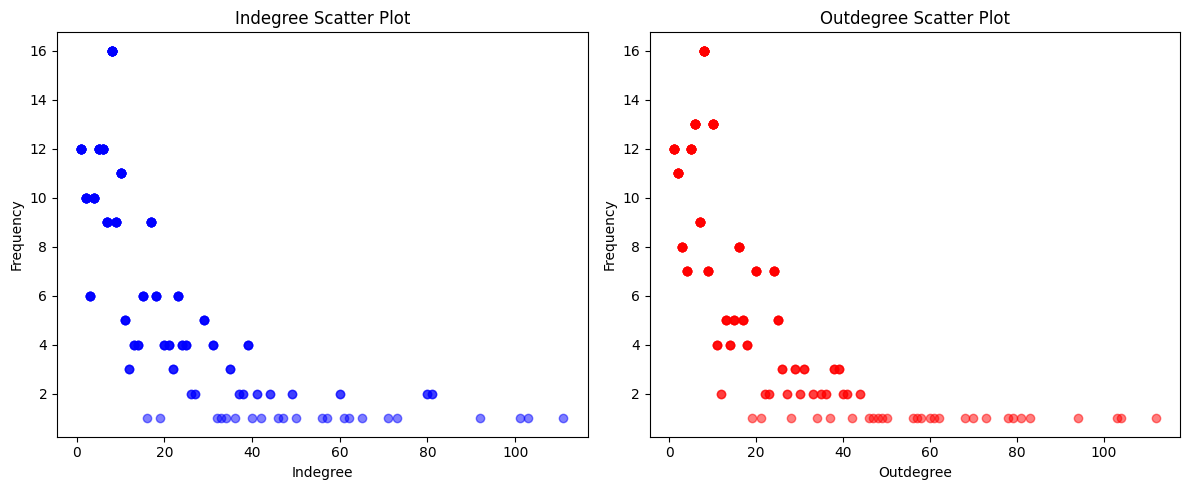

In [ ]:
import numpy as np

# Calculate indegree and outdegree
in_degrees = dict(G.in_degree())
out_degrees = dict(G.out_degree())

# Plot scatter plots of frequency vs. degree
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot for indegree
in_degrees_values = list(in_degrees.values())
in_degrees_frequency = [list(in_degrees.values()).count(deg) for deg in in_degrees_values]
ax1.scatter(in_degrees_values, in_degrees_frequency, color='b', alpha=0.5)
ax1.set_xlabel('Indegree')
ax1.set_ylabel('Frequency')
ax1.set_title('Indegree Scatter Plot')

# Scatter plot for outdegree
out_degrees_values = list(out_degrees.values())
out_degrees_frequency = [list(out_degrees.values()).count(deg) for deg in out_degrees_values]
ax2.scatter(out_degrees_values, out_degrees_frequency, color='r', alpha=0.5)
ax2.set_xlabel('Outdegree')
ax2.set_ylabel('Frequency')
ax2.set_title('Outdegree Scatter Plot')

plt.tight_layout()
plt.show()

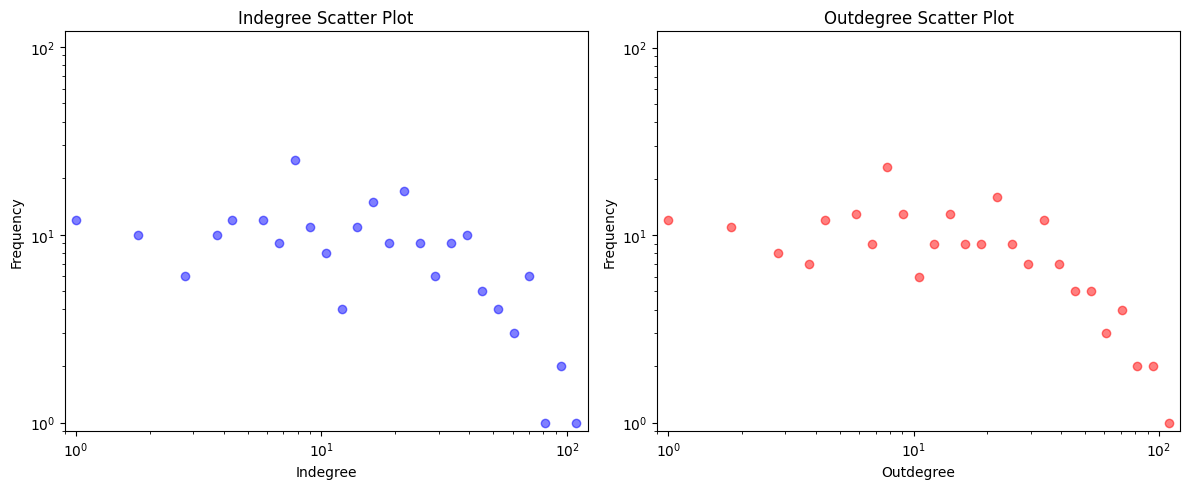

In [ ]:
import numpy as np

# Calculate indegree and outdegree
in_degrees = dict(G.in_degree())
out_degrees = dict(G.out_degree())

# Plot scatter plots of frequency vs. degree with logarithmic binning
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot for indegree
in_degrees_values = list(in_degrees.values())
in_degrees_frequency, in_degrees_bins = np.histogram(in_degrees_values, bins=np.logspace(np.log(1), np.log(max(in_degrees_values)), 75))
ax1.scatter(in_degrees_bins[:-1], in_degrees_frequency, color='b', alpha=0.5)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Indegree')
ax1.set_ylabel('Frequency')
ax1.set_title('Indegree Scatter Plot')
ax1.set_xlim(0.9, max(in_degrees_values)+10)  # Set x-axis limit
ax1.set_ylim(0.9, max(in_degrees_values)+10)

# Scatter plot for outdegree
out_degrees_values = list(out_degrees.values())
out_degrees_frequency, out_degrees_bins = np.histogram(out_degrees_values, bins=np.logspace(np.log(1), np.log(max(out_degrees_values)), 75))
ax2.scatter(out_degrees_bins[:-1], out_degrees_frequency, color='r', alpha=0.5)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel('Outdegree')
ax2.set_ylabel('Frequency')
ax2.set_title('Outdegree Scatter Plot')
ax2.set_xlim(0.9, max(out_degrees_values)+10)  # Set x-axis limit
ax2.set_ylim(0.9, max(out_degrees_values)+10)

plt.tight_layout()
plt.show()


# Goodness of Fit

In [ ]:
from scipy import stats

# Fit degree distribution to all continuous distributions in scipy.stats
distributions = ['alpha', 'anglit', 'arcsine', 'argus', 'betaprime', 'bradford', 'burr', 'burr12', 'cauchy', 'chi', 'chi2', 'cosine', 'crystalball', 'dgamma', 'dweibull', 'expon', 'exponnorm', 'exponpow', 'exponweib', 'f', 'fatiguelife', 'fisk', 'foldcauchy', 'foldnorm', 'gamma', 'gausshyper', 'genexpon', 'genextreme', 'gengamma', 'genhalflogistic', 'genhyperbolic', 'geninvgauss', 'genlogistic', 'gennorm', 'genpareto', 'gibrat', 'gompertz', 'gumbel_l', 'gumbel_r', 'halfcauchy', 'halfgennorm', 'halflogistic', 'halfnorm', 'hypsecant', 'invgamma', 'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'kappa3', 'kappa4', 'kstwobign', 'laplace', 'laplace_asymmetric', 'levy', 'levy_l', 'loggamma', 'logistic', 'loglaplace', 'lognorm', 'lomax', 'maxwell', 'mielke', 'moyal', 'nakagami', 'ncf', 'nct', 'ncx2', 'norm', 'norminvgauss', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm', 'rayleigh', 'rdist', 'recipinvgauss', 'reciprocal', 'rel_breitwigner', 'rice', 'semicircular', 'skewcauchy', 'skewnorm', 't', 'trapezoid', 'trapz', 'triang', 'truncexpon', 'truncnorm', 'truncpareto', 'truncweibull_min', 'uniform', 'vonmises', 'vonmises_line', 'wald', 'weibull_max', 'weibull_min', 'wrapcauchy']

# Perform KS and CVM tests for each distribution
results_indegree = {}
results_outdegree = {}
for dist_name in distributions:
    dist = getattr(stats, dist_name)

    # Fit distribution to data
    params_in = dist.fit(list(in_degrees.values()))
    params_out = dist.fit(list(out_degrees.values()))

    # Perform Kolmogorov-Smirnov test for indegree
    ks_stat_in, p_ks_in = stats.kstest(list(in_degrees.values()), dist_name, args=params_in)

    # Perform Kolmogorov-Smirnov test for outdegree
    ks_stat_out, p_ks_out = stats.kstest(list(out_degrees.values()), dist_name, args=params_out)

    # Perform Cramér-von Mises test for indegree
    cvm_result_in = stats.cramervonmises(list(in_degrees.values()), dist_name, args=params_in)
    p_cvm_in = cvm_result_in.pvalue

    # Perform Cramér-von Mises test for outdegree
    cvm_result_out = stats.cramervonmises(list(out_degrees.values()), dist_name, args=params_out)
    p_cvm_out = cvm_result_out.pvalue

    results_indegree[dist_name] = {'KS statistic': ks_stat_in, 'KS p-value': p_ks_in, 'CVM p-value': p_cvm_in}
    results_outdegree[dist_name] = {'KS statistic': ks_stat_out, 'KS p-value': p_ks_out, 'CVM p-value': p_cvm_out}

# Print results for indegree
print("Kolmogorov-Smirnov and Cramér-von Mises test results for indegree distribution:")
for dist_name, result in results_indegree.items():
    print(f"Distribution: {dist_name}")
    print(f" KS p-value: {result['KS p-value']} , CVM p-value: {result['CVM p-value']}")
    print()

# Print results for outdegree
print("Kolmogorov-Smirnov and Cramér-von Mises test results for outdegree distribution:")
for dist_name, result in results_outdegree.items():
    print(f"Distribution: {dist_name}")
    print(f" KS p-value: {result['KS p-value']} , CVM p-value: {result['CVM p-value']}")
    print()


Kolmogorov-Smirnov and Cramér-von Mises test results for indegree distribution:
Distribution: alpha
 KS p-value: 0.09704159695401415 , CVM p-value: 0.2613659284416847

Distribution: anglit
 KS p-value: 2.3908865928839244e-29 , CVM p-value: 2.475580851424297e-09

Distribution: arcsine
 KS p-value: 1.1614469662205127e-49 , CVM p-value: 2.6358552007721414e-09

Distribution: argus
 KS p-value: 1.5168160225174185e-70 , CVM p-value: 2.3194367537726635e-09

Distribution: betaprime
 KS p-value: 0.008107213081688646 , CVM p-value: 0.006337760259931158

Distribution: bradford
 KS p-value: 1.0123630259658046e-05 , CVM p-value: 2.0893185041948037e-05

Distribution: burr
 KS p-value: 0.01111864129297811 , CVM p-value: 0.0970073443679893

Distribution: burr12
 KS p-value: 3.745755501991842e-09 , CVM p-value: 4.14572631779464e-09

Distribution: cauchy
 KS p-value: 1.888442761152445e-09 , CVM p-value: 4.0053677130558185e-07

Distribution: chi
 KS p-value: 0.021360082734263174 , CVM p-value: 0.07209092

In [ ]:
print("Distributions with p-values greater than 0.05 for both indegree and outdegree:")
for dist_name in results_indegree.keys():
    if results_indegree[dist_name]['KS p-value'] > 0.05 and results_indegree[dist_name]['CVM p-value'] > 0.05 and results_outdegree[dist_name]['KS p-value'] > 0.05 and results_outdegree[dist_name]['CVM p-value'] > 0.05:
        print(dist_name)
        print(f"KS p-value (indegree): {results_indegree[dist_name]['KS p-value']}")
        print(f"CVM p-value (indegree): {results_indegree[dist_name]['CVM p-value']}")
        print(f"KS p-value (outdegree): {results_outdegree[dist_name]['KS p-value']}")
        print(f"CVM p-value (outdegree): {results_outdegree[dist_name]['CVM p-value']}")
        print()


Distributions with p-values greater than 0.05 for both indegree and outdegree:
fatiguelife
fisk
foldcauchy
genextreme
genpareto
gibrat
gompertz
halfcauchy
halfgennorm
invgamma
invgauss
invweibull
johnsonsb
johnsonsu
kappa3
lognorm
lomax
nct
norminvgauss
pareto
powerlognorm
recipinvgauss
skewcauchy
truncpareto
wald


In [ ]:
# Initialize variables to store the maximum p-values for in-degree and out-degree distributions
max_p_value_ks_in = 0
max_p_value_cvm_in = 0
max_p_value_ks_out = 0
max_p_value_cvm_out = 0
distribution_max_p_ks_in = None
distribution_max_p_cvm_in = None
distribution_max_p_ks_out = None
distribution_max_p_cvm_out = None

# Find the distribution with the highest p-values for in-degree KS and CVM tests
for dist_name, result in results_indegree.items():
    if result['KS p-value'] > max_p_value_ks_in:
        max_p_value_ks_in = result['KS p-value']
        distribution_max_p_ks_in = dist_name

    if result['CVM p-value'] > max_p_value_cvm_in:
        max_p_value_cvm_in = result['CVM p-value']
        distribution_max_p_cvm_in = dist_name

# Find the distribution with the highest p-values for out-degree KS and CVM tests
for dist_name, result in results_outdegree.items():
    if result['KS p-value'] > max_p_value_ks_out:
        max_p_value_ks_out = result['KS p-value']
        distribution_max_p_ks_out = dist_name

    if result['CVM p-value'] > max_p_value_cvm_out:
        max_p_value_cvm_out = result['CVM p-value']
        distribution_max_p_cvm_out = dist_name

# Print the distribution with the highest p-values for in-degree KS test
print("In-degree:")
print(f"Distribution with the highest p-value for KS test: {distribution_max_p_ks_in}")
print(f"KS p-value: {max_p_value_ks_in}")

# Print the distribution with the highest p-values for in-degree CVM test
print(f"Distribution with the highest p-value for CVM test: {distribution_max_p_cvm_in}")
print(f"CVM p-value: {max_p_value_cvm_in}")

# Print the distribution with the highest p-values for out-degree KS test
print("\nOut-degree:")
print(f"Distribution with the highest p-value for KS test: {distribution_max_p_ks_out}")
print(f"KS p-value: {max_p_value_ks_out}")

# Print the distribution with the highest p-values for out-degree CVM test
print(f"Distribution with the highest p-value for CVM test: {distribution_max_p_cvm_out}")
print(f"CVM p-value: {max_p_value_cvm_out}")


In-degree:
Distribution with the highest p-value for KS test: powerlognorm
KS p-value: 0.6583763300044126
Distribution with the highest p-value for CVM test: fatiguelife
CVM p-value: 0.7223471245577152

Out-degree:
Distribution with the highest p-value for KS test: invgauss
KS p-value: 0.6560948199943644
Distribution with the highest p-value for CVM test: fatiguelife
CVM p-value: 0.6886973753029743


# Pearson Coefficients

In [ ]:
from scipy.stats import pearsonr

bc = nx.betweenness_centrality(G)
dc = nx.degree_centrality(G)
ec = nx.eigenvector_centrality(G)
cc = nx.closeness_centrality(G)

npdc = np.array(list(dc.values()))
npbc = np.array(list(bc.values()))
npec = np.array(list(ec.values()))
npcc = np.array(list(cc.values()))

In [ ]:
pcdcbc, pvdcbc = pearsonr(npdc,npbc)
print(pcdcbc)
print(pvdcbc)

0.7368845454807673
3.954288578197113e-40


In [ ]:
pcdccc, pvdccc = pearsonr(npdc,npcc)
print(pcdccc)
print(pvdccc)

0.9006067432040702
2.2305919746046617e-83


In [ ]:
pcecdc, pvecdc = pearsonr(npec,npdc)
print(pcecdc)
print(pvecdc)

0.9604832898360859
5.907553491894213e-127


# Degree Centrality vs Strength of Node

In [ ]:
degcent = np.array(list(dict(G.degree()).values()))
ston = np.array(list(dict(G.degree(weight='weight')).values()))

Linear Correlation Coefficient (r): 0.8215476223729121


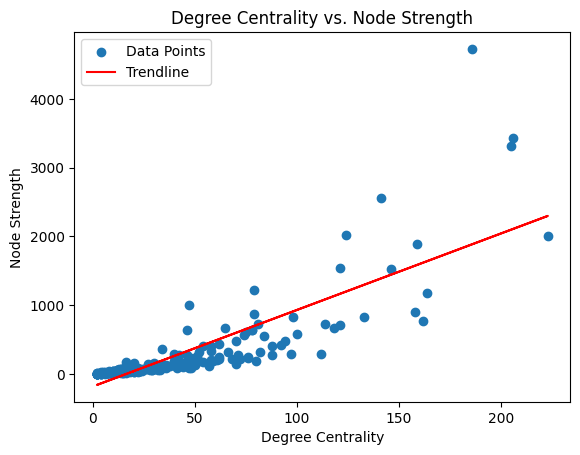

In [ ]:
from scipy.stats import linregress
# Plot degree centrality vs. node strength
plt.scatter(degcent, ston, label='Data Points')

# Add a trendline (linear regression)
slope, intercept, r_value, p_value, std_err = linregress(degcent, ston)
plt.plot(np.array(degcent), slope * np.array(degcent) + intercept, color='red', label='Trendline')

plt.xlabel('Degree Centrality')
plt.ylabel('Node Strength')
plt.title('Degree Centrality vs. Node Strength')
plt.legend()

# Calculate and print the linear correlation coefficient
print(f'Linear Correlation Coefficient (r): {r_value}')

# Show plot
plt.show()

# Variation of Clustering Coefficient with degree

-0.3831212082390454


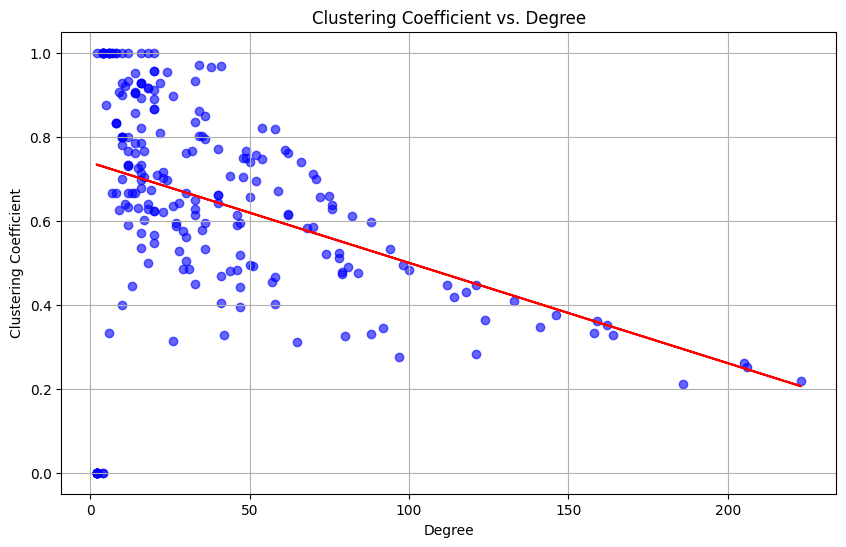

In [ ]:
cluscoef = nx.clustering(G)
degrees = dict(G.degree())

# Create lists to store degree and clustering coefficient
dl = []
ccl = []

# Iterate over nodes and store their degree and clustering coefficient
for node in G.nodes():
    dl.append(degrees[node])
    ccl.append(cluscoef[node])

# Convert lists to numpy arrays
degarr = np.array(dl)
ccarr = np.array(ccl)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(degarr, ccarr)
print(r_value)
# Plot the clustering coefficient of network with respect to degree
plt.figure(figsize=(10, 6))
plt.scatter(dl, ccl, color='b', alpha=0.6)
plt.plot(degarr, intercept + slope * degarr, color='red', label='Line of Best Fit')
plt.title('Clustering Coefficient vs. Degree')
plt.xlabel('Degree')
plt.ylabel('Clustering Coefficient')
plt.grid(True)
plt.show()

# Small vs Ultra Small World

In [ ]:
avgshpl = nx.average_shortest_path_length(G)
print(avgshpl)
num_nodes = nx.number_of_nodes(G)
print(num_nodes)
print(np.log10(num_nodes))

2.364215820046002
227
2.3560258571931225
